# Exploratory Data Analysis

### EDA on a tracklists with defined genre

In [3]:
#Dependencies
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
HH = pd.read_csv('HipHop.csv').set_index('Track URI')
Pop = pd.read_csv('Pop.csv').set_index('Track URI')
#Rock = pd.read_csv('Rock.csv').set_index('Track URI')

In [ ]:
HH = HH.drop(columns = ['key', 'mode', 'duration_ms', 'time_signature', 'genres'])
Pop = Pop.drop(columns = ['key', 'mode', 'duration_ms', 'time_signature', 'genres'])
Rock = Rock.drop(columns = ['key', 'mode', 'duration_ms', 'time_signature', 'genres'])

In [3]:
tracklist = pd.concat([HH, Pop, Rock])

In [5]:
tracklist.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genres'],
      dtype='object')

<AxesSubplot: xlabel='instrumentalness', ylabel='energy'>

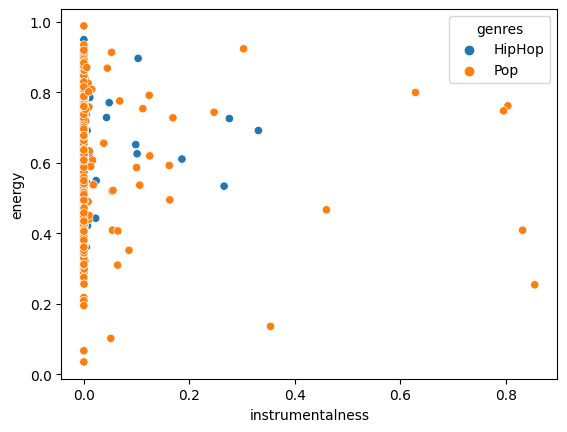

In [6]:
sns.scatterplot(data = tracklist, x = 'instrumentalness', y = 'energy', hue = 'genres')

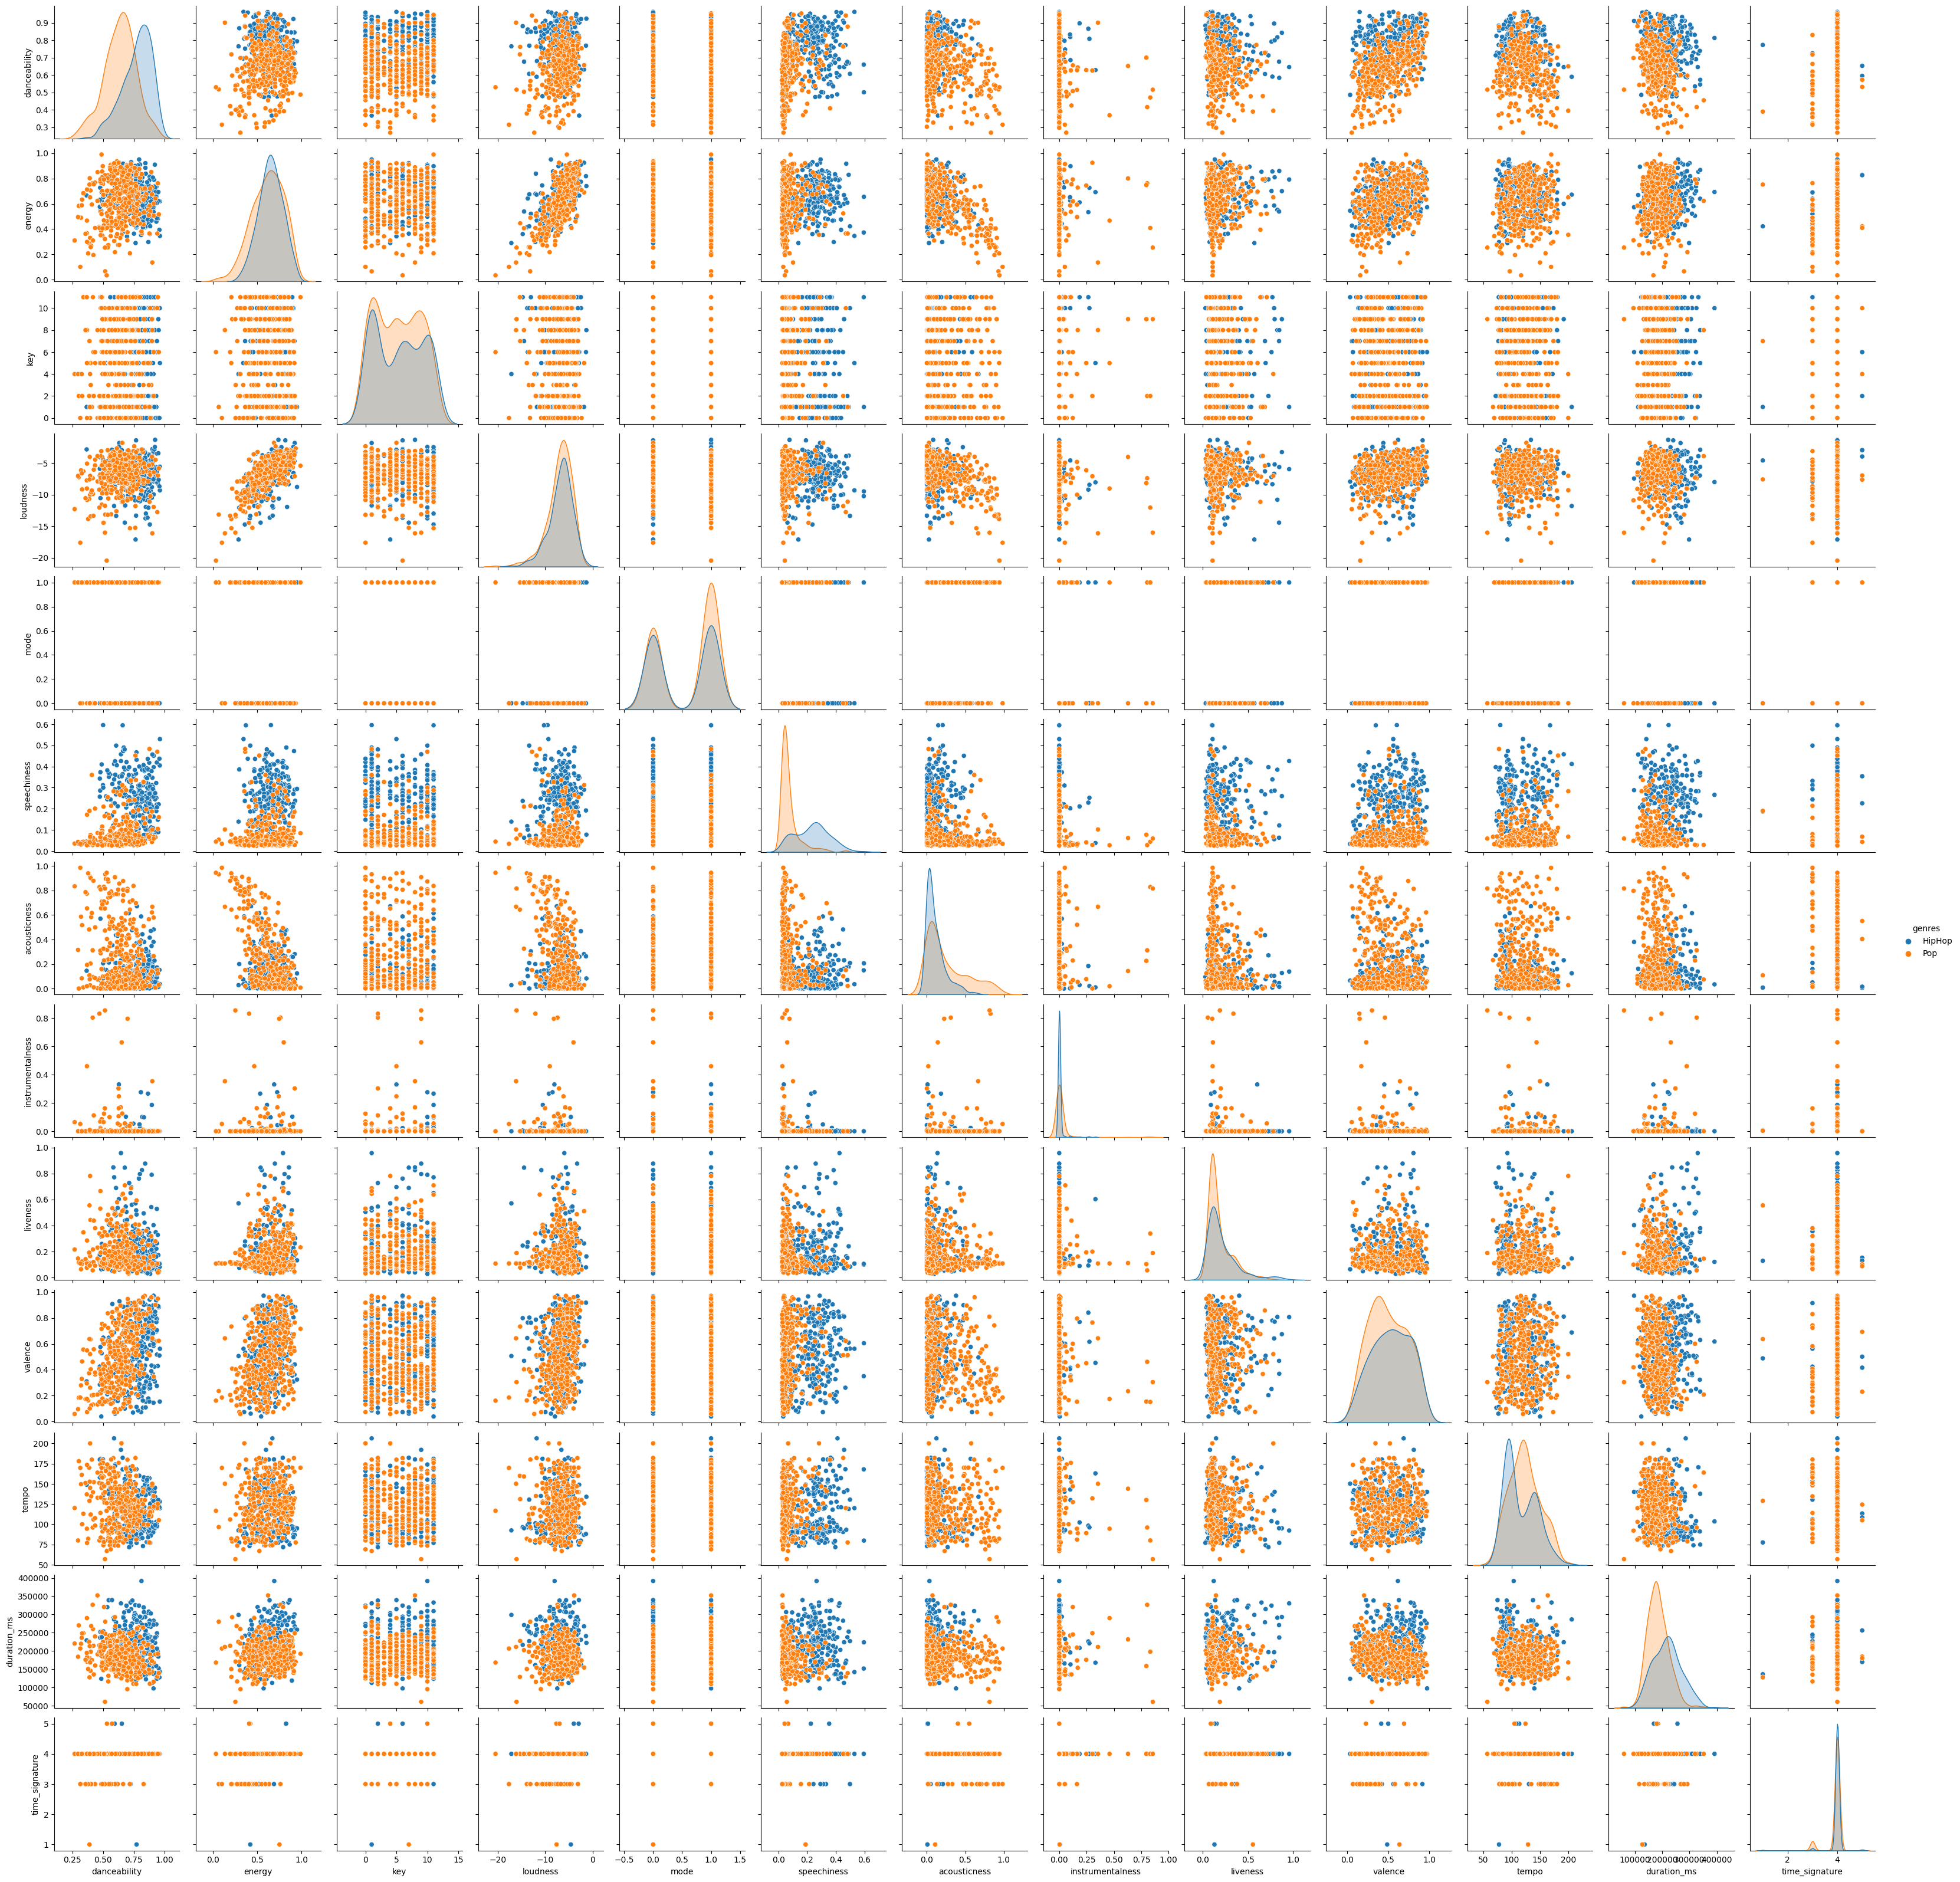

In [7]:
sns.pairplot(data = tracklist, hue = 'genres')

# Radar chart

In [ ]:
def calculate_mean(HH):   
    #Calculate the mean values for each feature
    mean_danceability = np.mean(HH['danceability'])
    mean_energy = np.mean(HH['energy'])
    mean_speechiness = np.mean(HH['speechiness'])
    mean_acousticness = np.mean(HH['acousticness'])
    mean_instrumentalness = np.mean(HH['instrumentalness'])
    mean_liveness = np.mean(HH['liveness'])
    mean_valence = np.mean(HH['valence'])
    # Normalize the loudness feature
    loudness_min = -60
    loudness_max = 0
    normalized_loudness = (HH['loudness'] - loudness_min) / (loudness_max - loudness_min)
    mean_loudness = np.mean(normalized_loudness)
    # Normalize the tempo feature
    tempo_min = np.min(HH['tempo'])
    tempo_max = np.max(HH['tempo'])
    normalized_tempo = (HH['tempo'] - tempo_min) / (tempo_max - tempo_min)
    mean_tempo = np.mean(normalized_tempo)

    # Define the features and their mean values
    features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']
    mean_values = [mean_danceability, mean_energy, mean_speechiness, mean_acousticness,
                    mean_instrumentalness, mean_liveness, mean_valence, mean_loudness, mean_tempo]
    return features, mean_values

In [ ]:
HHfeatures, HHmean_values = calculate_mean(HH)
Popfeatures, Popmean_values = calculate_mean(Pop)
Rockfeatures, Rockmean_values = calculate_mean(Rock)

In [ ]:
fig = px.line_polar(HH, r = HHmean_values, theta = HHfeatures, line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
fig = px.line_polar(HH, r = Popmean_values, theta = Popfeatures, line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
fig = px.line_polar(Rock, r = Rockmean_values, theta = Rockfeatures, line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = HHmean_values,
      theta = HHfeatures,
      fill = 'toself',
      name = 'HipHop'
))

fig.add_trace(go.Scatterpolar(
      r = Popmean_values,
      theta = Popfeatures,
    fill = 'toself',
      name = 'Pop'
))

fig.add_trace(go.Scatterpolar(
      r = Rockmean_values,
      theta = Rockfeatures,
    fill = 'toself',
      name = 'Rock'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.9]
    )),
  showlegend=True
)